In [1]:
import torch
import torch.nn as nn
import torchvision

import keras4torch as k4t

k4t.__version__

'1.0.0m'

In [2]:
mnist = torchvision.datasets.MNIST(root='./', download=True)
x, y = mnist.train_data.unsqueeze(1), mnist.train_labels

x = x.float() / 255.0    # scale the pixels to [0, 1]

x_train, y_train = x[:20000], y[:20000]
x_test, y_test = x[20000:25000], y[20000:25000]

In [3]:
model = torch.nn.Sequential(
    nn.Conv2d(1, 3, 1),
    torchvision.models.resnet18(num_classes=10)
)

In [4]:
model = k4t.Model(model)

model.count_params()

11181648

In [5]:
def acc(y_pred, y_true):
    return (y_pred.argmax(-1) == y_true).float().mean()

model.compile(
    optimizer=torch.optim.SGD(model.parameters(), lr=1e-2),
    loss=nn.CrossEntropyLoss(),
    metrics=[acc]
)

In [6]:
history = model.fit(x_train, y_train,
                	epochs=10,
                	batch_size=512,
                	validation_split=0.2,
                	)

Train on 16000 samples, validate on 4000 samples:
Epoch 1/10 - 12s - loss: 0.9547 - acc: 0.7476 - val_loss: 2.1561 - val_acc: 0.1545 - lr: 1e-02
Epoch 2/10 - 11s - loss: 0.2792 - acc: 0.9344 - val_loss: 0.2687 - val_acc: 0.9283 - lr: 1e-02
Epoch 3/10 - 11s - loss: 0.1670 - acc: 0.9609 - val_loss: 0.1907 - val_acc: 0.9448 - lr: 1e-02
Epoch 4/10 - 11s - loss: 0.1148 - acc: 0.9735 - val_loss: 0.1597 - val_acc: 0.9540 - lr: 1e-02
Epoch 5/10 - 11s - loss: 0.0853 - acc: 0.9810 - val_loss: 0.1447 - val_acc: 0.9570 - lr: 1e-02
Epoch 6/10 - 11s - loss: 0.0646 - acc: 0.9879 - val_loss: 0.1322 - val_acc: 0.9578 - lr: 1e-02
Epoch 7/10 - 11s - loss: 0.0507 - acc: 0.9923 - val_loss: 0.1252 - val_acc: 0.9630 - lr: 1e-02
Epoch 8/10 - 11s - loss: 0.0405 - acc: 0.9950 - val_loss: 0.1176 - val_acc: 0.9648 - lr: 1e-02
Epoch 9/10 - 11s - loss: 0.0326 - acc: 0.9964 - val_loss: 0.1129 - val_acc: 0.9663 - lr: 1e-02
Epoch 10/10 - 11s - loss: 0.0272 - acc: 0.9978 - val_loss: 0.1099 - val_acc: 0.9665 - lr: 1e-02

<AxesSubplot:>

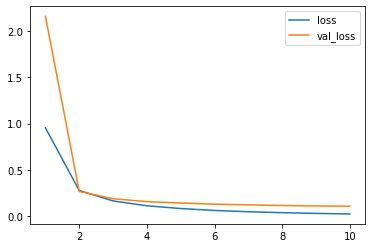

In [7]:
history.plot(kind='line', y=['loss', 'val_loss'])

In [8]:
model.evaluate(x_test, y_test)

{'loss': 0.10574746131896973, 'acc': 0.967199981212616}